In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [43]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()  #预览数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [44]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


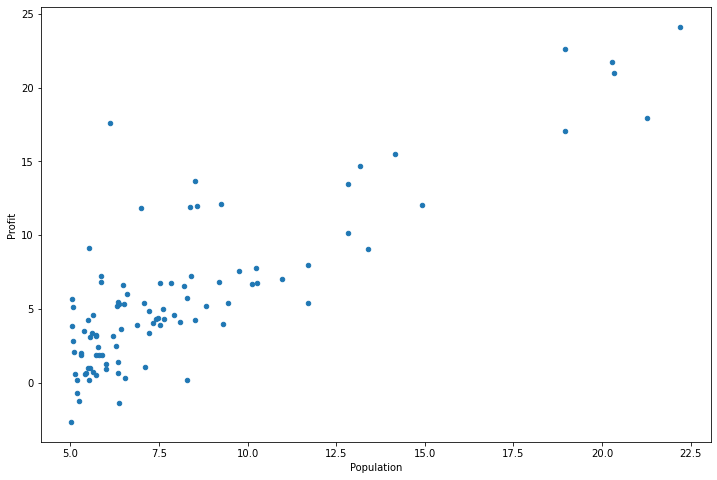

In [45]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
plt.show()

In [46]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [47]:
data.insert(0, "Ones", 1)

In [48]:
cols = data.shape[1]  # shape[0]表示行数，shape[1]表示列数
X = data.iloc[:, 0:cols - 1]  # 逗号前面是抽取哪些行，逗号后面是抽取哪些列
y = data.iloc[:, cols - 1:cols]

In [49]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [50]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [51]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [52]:
theta

matrix([[0, 0]])

In [53]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [54]:
computeCost(X, y, theta)


32.072733877455676

以上就是在求代价函数J()---->computeCost()

---

batch gradient decent(批量梯度下降)

In [55]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameter = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameter):
            term = np.multiply(error, X[:, j])  #计算(h(x)-y)*x
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [58]:
alpha = 0.01
iters = 1000

In [59]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [60]:
computeCost(X, y, g)

4.515955503078914

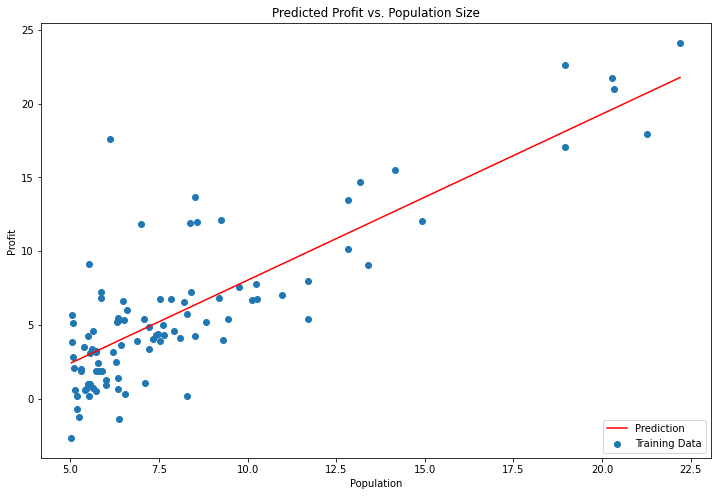

In [62]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=4)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title("Predicted Profit vs. Population Size")
plt.show()

打印代价函数随迭代次数的变化的图像

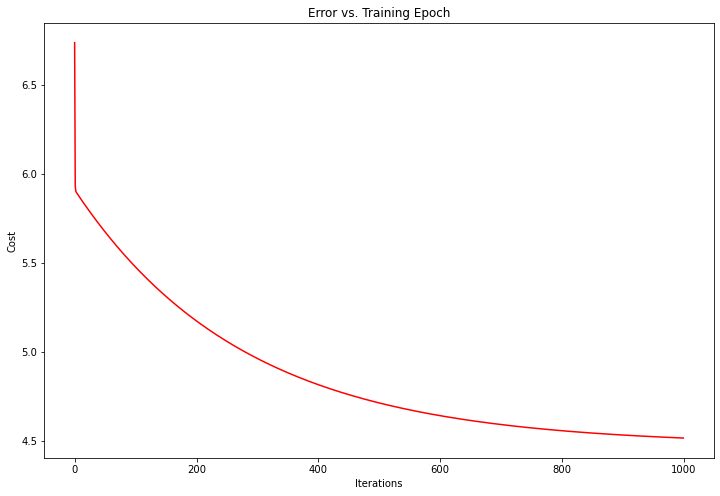

In [64]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs. Training Epoch")
plt.show()

---

多变量线性回归

In [65]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [66]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [67]:
data2.insert(0, 'Ones', 1)

cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
y2 = data2.iloc[:, cols - 1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

computeCost(X2, y2, theta2)

0.48936170212765967

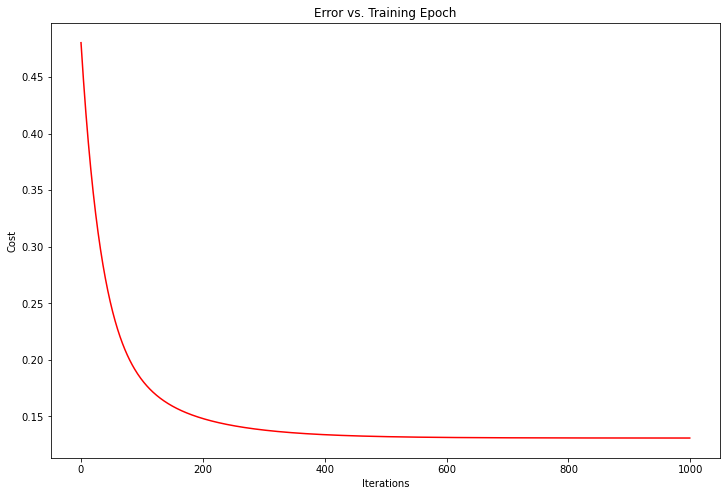

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

---

正规方程

In [70]:
def normalEqn(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [71]:
final_theta2 = normalEqn(X,y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])